DATAloeader #lib

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load dữ liệu MNIST
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int8)

# Chỉ lấy các số 0 và 1
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]
print(X.shape, y.shape)
# 2. Giảm số chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 3. Huấn luyện mô hình SVM
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_reduced, y)






c:\Users\Acer\miniconda3\envs\pj\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(14780, 784) (14780,)


SVC(kernel='linear')

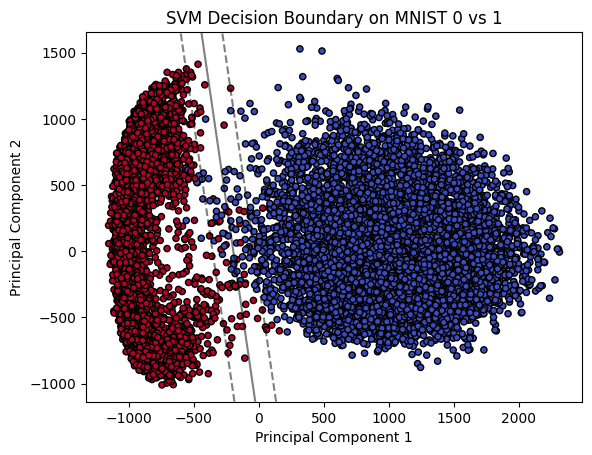

In [44]:
# 4. Vẽ biểu đồ
# Vẽ các điểm dữ liệu
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)# Vẽ đường phân cách và các biên quyết định
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on MNIST 0 vs 1")
plt.show()

dataloader #maybe

In [183]:
from utils import Dataloader
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [184]:
def array_to_matrix(arr, n_cols):
    n_rows = len(arr) // n_cols
    return np.array(arr).reshape(n_rows, n_cols)

In [185]:
mnist = Dataloader(None, None, 'mnist', None, None)
print(f"Exporting mnist to python... ")
data = mnist.export_to_python()

Dataset:  mnist
X_train:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train:  [[ 1. -1.]
 [-1.  1.]]
X_test:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test:  [[-1.  1.]
 [ 1. -1.]]
(11881, 784) (11881, 2) (2012, 784) (2012, 2)
Exporting mnist to python... 


In [186]:
C = 1.0
clf_mnist = SVC(kernel = 'linear', C = C)
X_shape = mnist.X_train_shape
X_train = data[0]
y_train = data[1]
y = array_to_matrix(y_train,2)
X = array_to_matrix(X_train,X_shape[1])
y = np.array([np.argmax(np.append(i,0)) for i in y])
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
clf_mnist.fit(X_reduced, y) 

SVC(kernel='linear')

In [187]:
X_test = array_to_matrix(data[2],X_shape[1])
y_test = array_to_matrix(data[3],2)
y_test = np.array([np.argmax(np.append(i,0)) for i in y_test])
X_test_reduced = pca.transform(X_test)
y_pred = clf_mnist.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9512922465208747


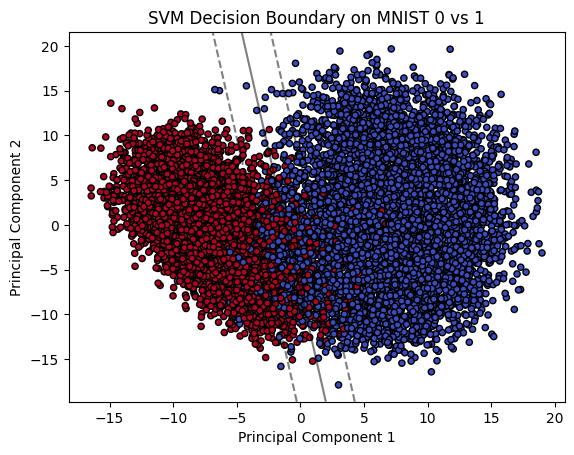

In [188]:
# 4. Vẽ biểu đồ
# Vẽ các điểm dữ liệu
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = clf_mnist.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)# Vẽ đường phân cách và các biên quyết định
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on MNIST 0 vs 1")
plt.show()